# Analysis of Endangered Species in National Parks
## Introduction
The conservation of biodiversity within the National Park Service (NPS) is a critical objective, yet numerous species within this protected areas are classified as endagered. This project seeks to analyze the conservation statuses of endagered species across various national parks to uncover patterns or themese in the types of species affected.
## Project Scoping
### Project Goals:
In this project, the perspective will be through a biodiversity analyst for the National Parks Service. The National Parks Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Some questions that are posed:

- What is the distribution of conservation status for species?
- Are certain type of species more likely to be endangered?
- Are the difference between species and their conservation statuses significant?
- What is most prevalent? What is their distribution amongst parks?

### Data
- Data Source: The data for this project was provided by [codecademy](https://www.codecademy.com/learn) for the Biodiversity in National Parks project. The dataset has two data files, `observations.csv` and `species_info.csv`.
- Data Content: The first `csv` file holds recorded sightings of different species at several national parks for the past 7 days. The other file contains information about the different species and their conservation statuses.
- Data Preparation: Data cleaning, and handling missing values.
This dataset will be used to analyze the goals of this project.

### Analysis
In this sections, summary statistics and visualization techniques will be employed to understand the data better. Statistical inference will be used to test if the observed vales are statistically significant. Key metrics that will be computed:
- Counts
- Distributions
- relationship between species
- conservation status of species
- observatios of species in parks

### Evaluation
I will revisit the analysis to check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This seaction will reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could include limitations or if any of the analysis could have been done using different methodologies.


## Import Python Modules
Import the primary modules that will be used in this project.

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline


### Loading the Data

### Species
The columns in the `species_info.csv` file include:
- **category:** The category of taxanomy for each species
- **scientific_name:** The scientific name of each species
- **common_names:** The common names of each species
- **conservation_status:** The species conservation status

In [3]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### Observations
The columns in the `observations.csv` file include:
- **scientific_name:** The scientific name of each species
- **park_name:** The name of the national park
- **observations:** The number of observations in the past 7 days

In [4]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


### Data Characteristics
This section checks the dimensions of the dataset, for `species` there are 5,824 rows and 4 columns while `observations` have 23,296 rows and 3 columns.

In [5]:
print(f'species shape: {species.shape}')
print(f'observations shape: {observations.shape}')

species shape: (5824, 4)
observations shape: (23296, 3)


## Explore the Data
This section explores the `species` data a little bit more in depth. First, I try to find the number of distinct species in the dataset using the `scientific_name` column to get 5,541 species. That's quite a lot of species!

In [6]:
print(f'Number of species in the dataset: {species.scientific_name.nunique()}')

Number of species in the dataset: 5541


Next is to find the number of `category` that are represented in the dataset. There are 7 categories including animals and plants.

In [7]:
print(f'Number of categories: {species.category.nunique()}')
print(f'Categories: {species.category.unique()}')

Number of categories: 7
Categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Drilling down on the categories, I can get the count of `category` in the data. As we can see, vascular plants are by far the largest share of species with 4,470 in the data, and reptiles being the smallest with 79.

In [8]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Another column to explore is the `conservation_status` column. The column has 4 categories, `Species of Concern`, `Endangered`, `Threatened`, `In Recovery`, and `nan` values.

In [9]:
print(f'Number of conservation statuses: {species.conservation_status.nunique()}')
print(f'Conservation statuses: {species.conservation_status.unique()}')

Number of conservation statuses: 4
Conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


This section counts the number of observations in the breakdown of categories in `conservation_status`. There are 5,633 `nan` values which means they are species without concerns. On the other hand, there are 161 species of concern, 16 endangered species, 10 threatened species, and 4 species in recovery.

Note: The presence of `Nan` values for the `conservation_status` is structural because these missing values represents species that are not under any conservation status.

In [10]:
print(f'na values: {species.conservation_status.isna().sum()}')

species.groupby('conservation_status').size()

na values: 5633


conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

### Observations
This section looks at the `observations` data. There are only 4 national parks represented in our dataset.

In [11]:
print(f'Number of parks: {observations.park_name.nunique()}')
print(f'Parks" {observations.park_name.unique()}')

Number of parks: 4
Parks" ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


Here are the total number of observations logged in the park. There are 3,314,739 sightings in the last 7 days! that's a lot of observations!

In [12]:
print(f'Total observations: {observations.observations.sum()}')

Total observations: 3314739


## Analysis

This section analyzes the data after the initial exploration. First, I clean and explore the `conservation_status` column in `species`.

The column `conservation_status` has these values:

- `species of Concern`: declining or appear to be in need of conservation
- `Endangered`: seriosuly at risk of extinction
- `Threatened`: Vulnerable to endangerment in the near future
- `In Recovery`: formerly `Endangered`, but currently not in danger of extinction throughout most of its range

I will convert all the `nan` values to `No Intervention`.

In [13]:
species.fillna('No Intervention', inplace=True)
species.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

Next is to check the different categories that are nested in `conservation_status` column except for the ones that do not require intervention. 

For those in the `Endangered` status, 7 were mammals and 4 were birds. In the `In Recovery` status, there were 3 birds and 1 mammal, which could signal that the birds are boucncing back better than the mammals.

In [14]:
conservation_category = species[species.conservation_status != 'No Intervention']\
    .groupby(['conservation_status', 'category'])['scientific_name']\
    .count()\
    .unstack()

conservation_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0.5, 1.0, 'Species and Conservation Status')

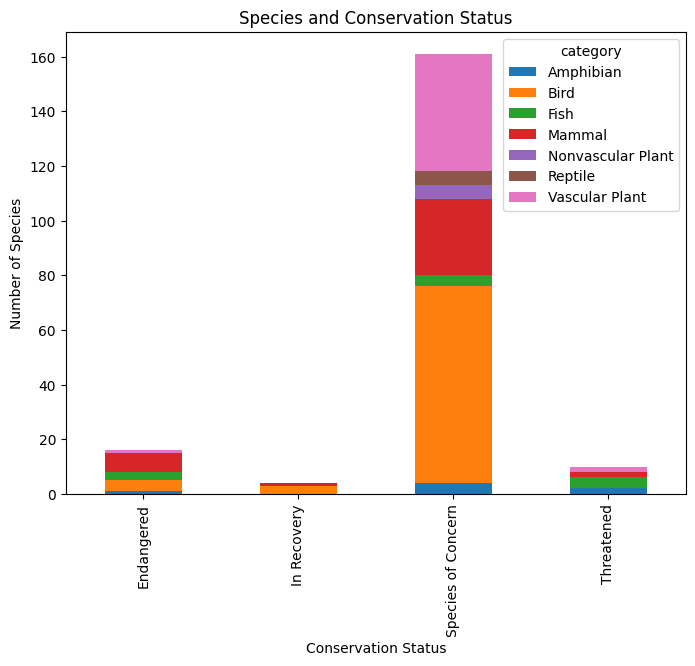

In [38]:
ax = conservation_category.plot(kind = 'bar', stacked=True, figsize=(8,6))
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")
ax.set_title("Species and Conservation Status")


## In Conservation

The next question is if certain types of species are more likely to be endangered? I create a new column `is_protected` and include any species that had a value other than `No Intervention`.

In [16]:
species['is_protected'] = species.conservation_status != 'No Intervention'

After creating the new column, I then group by `category` and `is_protected` to show the break down of each species type and protection status.

It's evident from this dataset that Birds, Vascular plants, and Mammals have a higher absoulte number of species protected.

In [17]:
category_counts = species.groupby(['category', 'is_protected'])\
    .scientific_name.nunique()\
    .reset_index()\
    .pivot(columns='is_protected', index='category', values='scientific_name')\
    .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Absolute numbers are not always the most useful statistic, therefore I also calculate the rate of protection that each `category` exhibits in the data. 

From this analysis, one can see that ~17% of mammals were under protecteion, as well as ~15% of birds.

In [18]:
category_counts['percent_protected'] = category_counts.protected / (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


In [19]:
%%html
<style>
    table {float:left}
</style>


### Statistical Significance

In this section, I run chi-squared tests to see if different species have statistically significant differences in conservation status rates. To run these tests, I am using a contingency table that looks like this:

|       | protected | not protected |
| ---   | --- | ---|
|Mammal | ?   | ?  |
|Bird   | ?   | ?  |

The results returned many values, but I am interested in the pvalue of 0.69. The standard p-value to test statistical significance is 0.05. For the value returned from this test, the value of 0.69 is much larger than 0.05. This means that in the case of Mammals and Birds, there does not seem to be any significant relationship beetween them. In other words, the observed differences in conservation statuses of Mammals and Birds is likely due to chance rather than a specific cause. 

In [20]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146], [75, 413]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

The next pair tests the difference between `Reptile` and `Mammal`.

The format is again going to look like this:
|       | protected | not protected |
| ---      | --- | ---|
|Mammal    | ?   | ?  |
|Reptile   | ?   | ?  |

This time the pvalue is 0.039 which is below the standard threshold of 0.05. This pvalue can be take that the difference between reptile and mammal is statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared with Reptiles. In other words, the observed difference in conservation statuses between mammals and reptiles is likey *not* due to chance. 

In [21]:
contingency2 = [[30, 146], [5,73]]
chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

### Species in Parks

The next set of analys is from data on the recording of sightings of different species at several national parks for the past 7 days.
First, I look at the common names from `species` to get an idea of the most prevalent animals in the dataset. To achieve this, I split up the data into individual names

In [22]:
import string

# This function iterates over each punctuation character and replaces it with an empty string,
# effectively removing it
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text


def process_common_names(df, category):
    filtered_df = df[df['category'] == category]
    processed_names = []
    for name in filtered_df['common_names']:
        clean_name = remove_punctuations(name)
        split_name = clean_name.split()
        processed_names.append(split_name)
    return processed_names

# Look at the common names for mammals
common_names = process_common_names(species, 'Mammal')

common_names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Then, I remove duplicate names on each row as they should not be counted more than once per species.

In [23]:
clean_rows = []

for item in common_names:
    item = list(dict.fromkeys(item))
    clean_rows.append(item)

clean_rows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Next, I flatten the list into one list for easier use.

In [24]:
res = [item for sublist in clean_rows for item in sublist]

res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

Now the data is ready to be able to count the number of occurences of each word. From this analysis, `Bat` occured 23 times while `Shrew` came up 18 times. 

In [25]:
count_of_words = []

for i in res:
    x = res.count(i)
    count_of_words.append((i, x))

pd.DataFrame(set(count_of_words), columns=['word', 'count']).sort_values("count", ascending=False).head(10)

,word,count
152,Bat,23
174,Shrew,18
94,Myotis,17
27,Mouse,16
190,Chipmunk,13
53,Squirrel,12
165,American,12
5,Vole,11
29,Eastern,11
164,Mountain,10


In the data, there are several different scientific names for different types of bats. In this section, I try to figure out which rows of `species` are referring to bats. I create a new column of boolean values to check if `is_bat` is `True`.

In [26]:
species['is_bat'] = species.common_names.str.contains("\\bBat\\b", regex=True)

species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


A subset of the data where `is_bat` is true. AS we can see, there are a lot of different species of bats and a mix of protected vs. non_protected species.

In [27]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


To get a more cleare picture, I merge the results of bat species with `observations` to create a `DataFrame` with observations of bat across the four national parks.

In [28]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
2,Nycticeius humeralis,Yellowstone National Park,219,Mammal,Evening Bat,No Intervention,False,True
3,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
4,Lasiurus borealis,Yosemite National Park,134,Mammal,"Eastern Red Bat, Red Bat",No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Eptesicus fuscus,Bryce National Park,72,Mammal,Big Brown Bat,Species of Concern,True,True
140,Eptesicus fuscus,Bryce National Park,72,Mammal,"Big Brown Bat, Big Brown Bat",Species of Concern,True,True
141,Myotis leibii,Yellowstone National Park,233,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Lasionycteris noctivagans,Bryce National Park,128,Mammal,Silver-Haired Bat,Species of Concern,True,True


Here I check how many total bat observations(across all species) were made at each national park.

The total number of bats observed in each national park is in the table below. Yellowstone national park seems to have the largest with 8,362 observations and the Great Smoky Mountains National Park with the smallest with 2,411.

In [29]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


This section sees each park broken down by protected vs. non-protected bat sightings. From the data, it seems that every park except for Great Smoky Mountains National Park has more sightings of protected bats than not. This could be considered a great sign for bats.

In [30]:
observations_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()

observations_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


Here I plot the output of the last data manipulation.

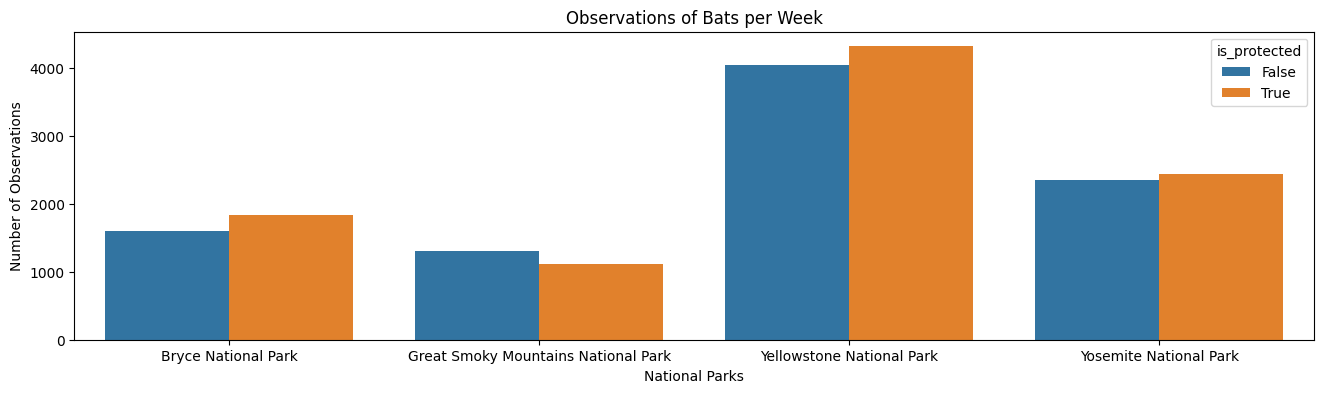

In [31]:
plt.figure(figsize=(16, 4))
sns.barplot(x=observations_by_park.park_name, y=observations_by_park.observations, hue=observations_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

## Conclusions

In this project, several data visualizations and inferences were made about the various species in four of the National Parks that comprised this data set.

This project was able to answer some of the questions first posed in the beginning:
- What is the distribution of the conservation status of species?
    - The vast majority of species were not part of conservation (5,633 vs. 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the difference between species and their conservation status significant?
    - While Mammals and Birds did not have significant difference in consevation percentage, Mammals and Reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distirbution amongst parks?
    - From this analysis we found that Bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.

## Further Research

This dataset only included observations from the past 7 days which prohibits analysis of changes over time. It would be interesting to see how the conservation status for various species changes over time. Another missing piece of information is the Area of each park. It can be assumed that Yellowstone National Park is much larger than the other parks which would mean that it would exhibit more observations and greater biodiversity. Finally, if precise locations were recorded, the spatial distribution of the species could alse be observed and test if these observations are spatially clustered.